In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imagens-iris/baixados.jpeg
/kaggle/input/imagens-iris/baixados.png
/kaggle/input/iris-data/Iris.csv


# **Import the Libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# **Loading the Dataset**

In [3]:
df = pd.read_csv("/kaggle/input/iris-data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


SepalLengthCm

SepalWidthCm

PetalLengthCm

PetalWidthCm

Species

# **Getting to know the dataset**

In [4]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
df.drop(["Id"], axis = 1, inplace = True)

In [6]:
df["Species"] = df["Species"].str.replace("Iris-", "")

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


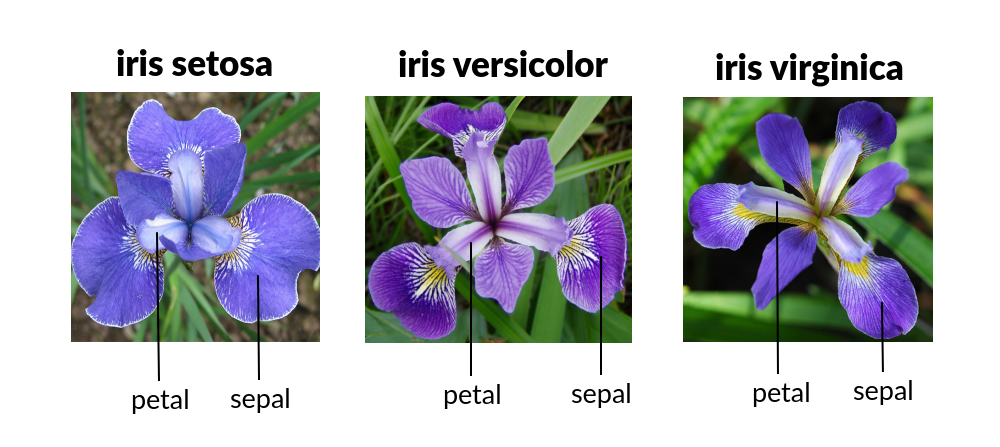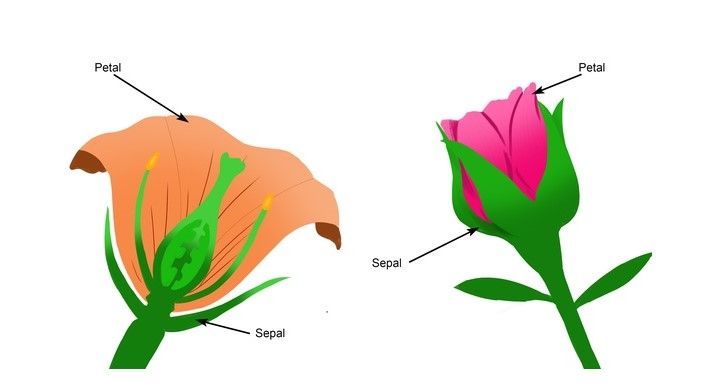

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# **EDA**

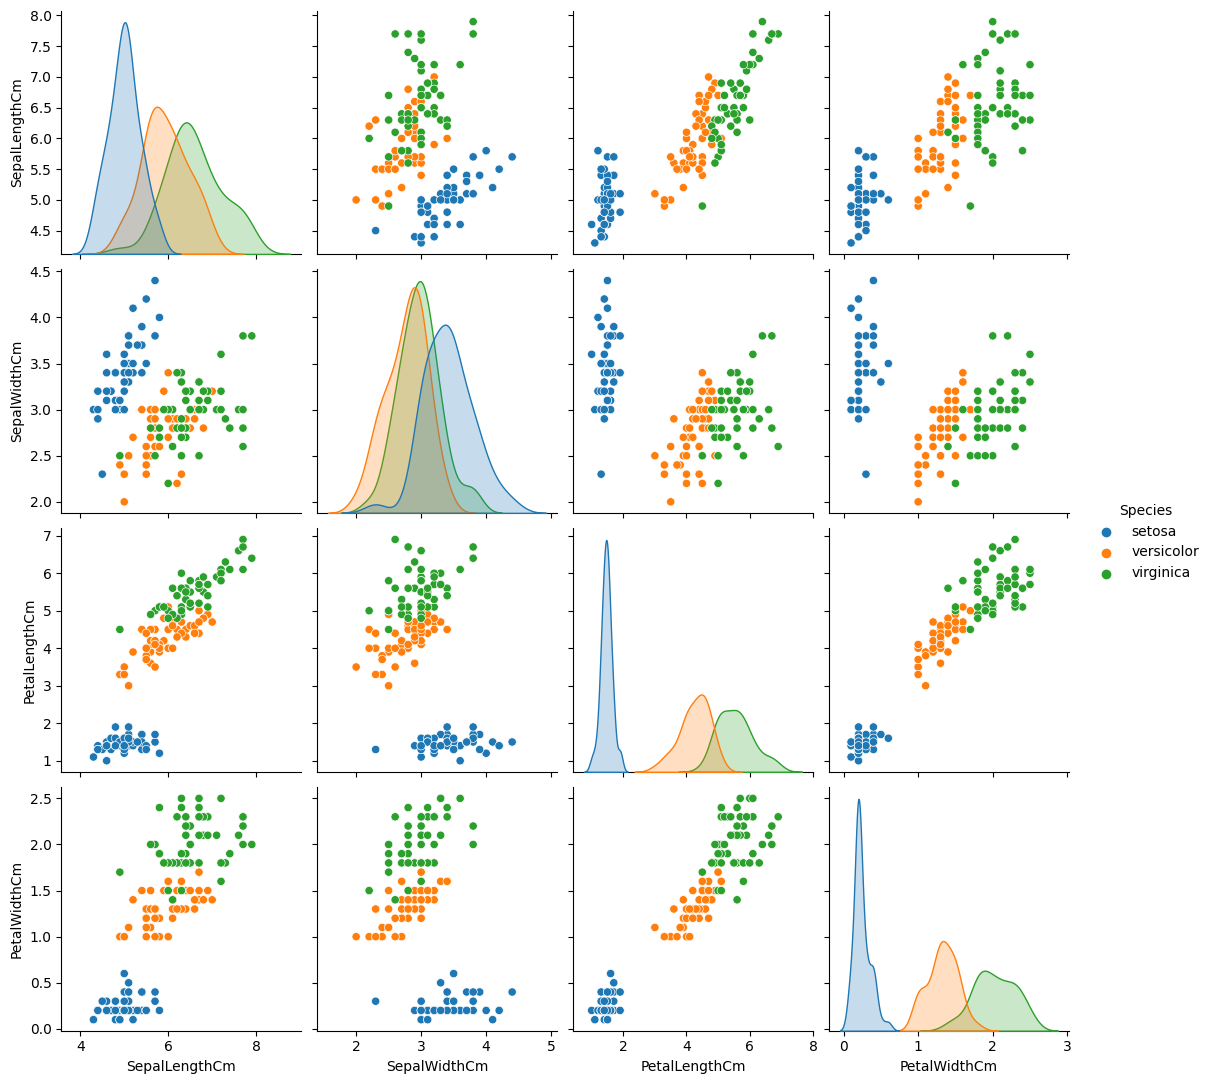

In [9]:
sns.pairplot(df, hue = "Species", height = 2.75)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df["Species_Num"] = df["Species"]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Num
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [12]:
df["Species_Num"] = df["Species_Num"].str.replace("setosa", "1")
df["Species_Num"] = df["Species_Num"].str.replace("versicolor", "2")
df["Species_Num"] = df["Species_Num"].str.replace("virginica", "3")

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Num
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   Species_Num    150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


In [15]:
df["Species_Num"] = pd.to_numeric(df["Species_Num"], downcast = "integer")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   Species_Num    150 non-null    int8   
dtypes: float64(4), int8(1), object(1)
memory usage: 6.1+ KB


<Axes: >

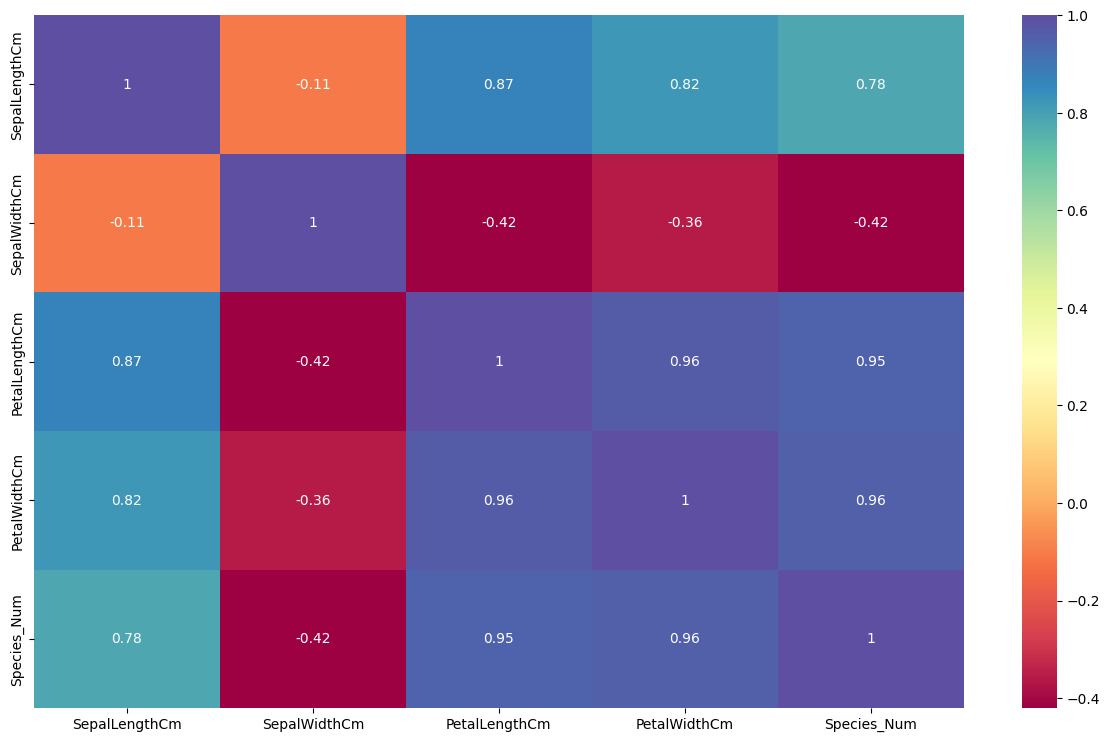

In [16]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(numeric_only = True), cmap = "Spectral", annot = True)

In [17]:
df.drop(["PetalLengthCm", "Species_Num"], axis = 1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


# **Decision Tree Modelling**

In [18]:
X = df.drop(["Species"], axis = 1)
y = df.Species

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [22]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred = dt_model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9736842105263158


In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
cv_scores = cross_val_score(estimator = dt_model, X=X_train, y =y_train, cv = 10)
cv_scores.mean()

0.8916666666666664

In [28]:
cv_scores

array([0.91666667, 1.        , 1.        , 1.        , 0.63636364,
       0.90909091, 0.90909091, 0.90909091, 0.90909091, 0.72727273])

In [29]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


Text(0.5, 23.52222222222222, 'Predicted Label')

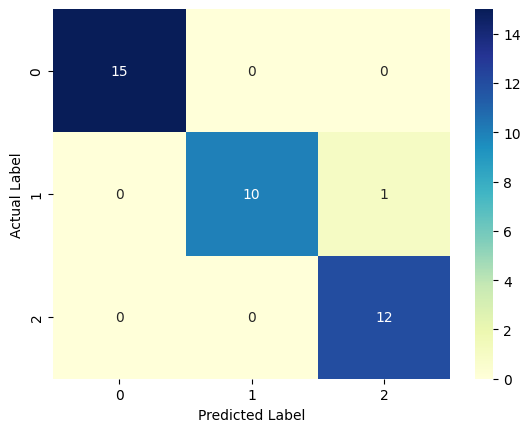

In [30]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot = True, cmap = "YlGnBu")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [32]:
from sklearn import tree

In [33]:
list(df.columns[:-1])

['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']

In [34]:
features = list(df.columns[:-1])
targets = ["setosa", "versicolor", "virginica"]
print(features)
print(targets)

['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']
['setosa', 'versicolor', 'virginica']


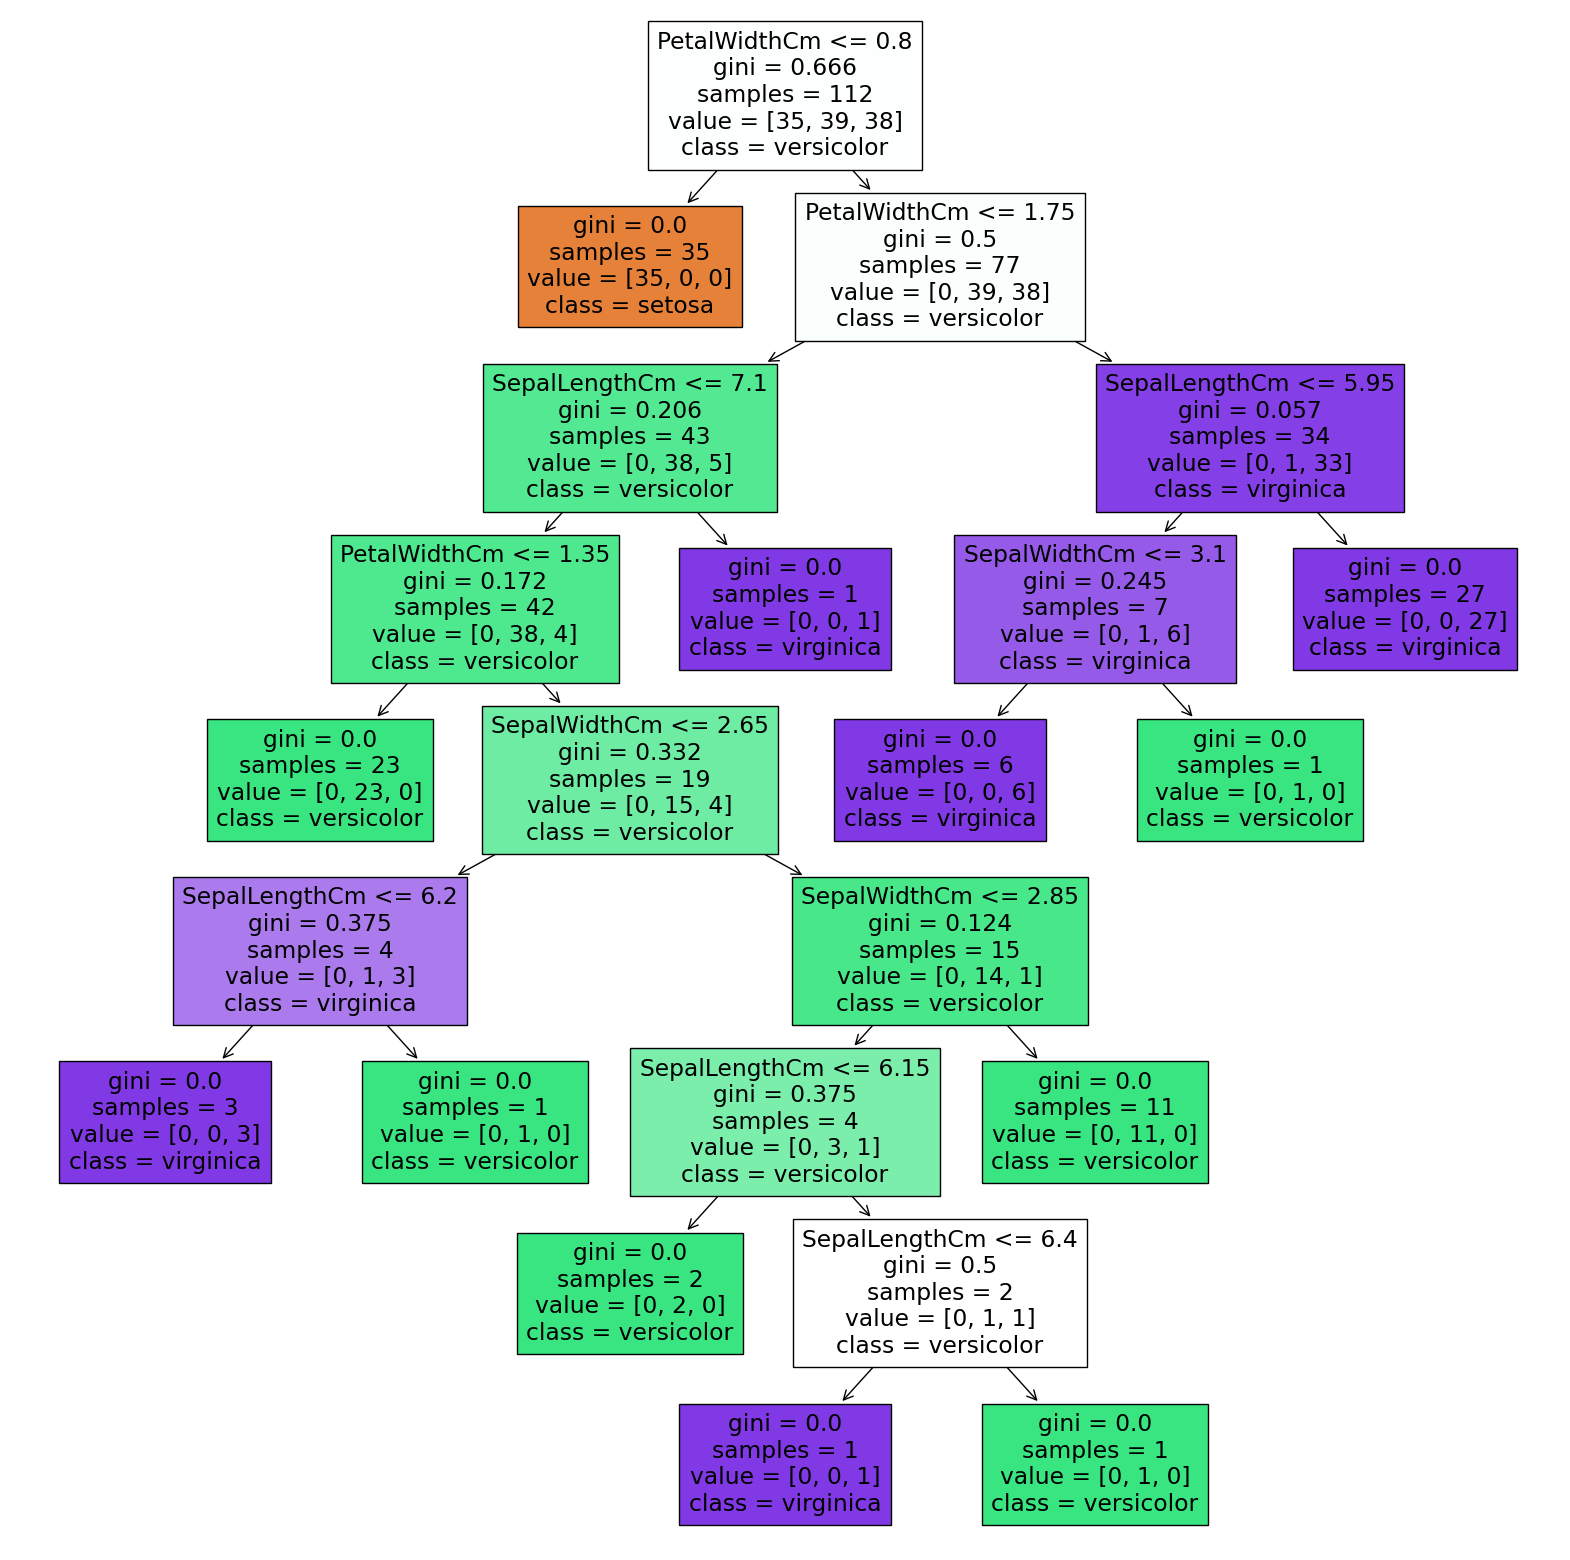

In [35]:
plt.figure(figsize = (20,20))
tree2 = tree.plot_tree(dt_model, filled = True, feature_names = features, class_names = targets)

# **Hyperparameter Optimization with Python**

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
dt_model2 = DecisionTreeClassifier()

In [38]:
dt_param = {"criterion": ["gini", "entropy"],
           "max_depth": np.arange(2, 14, 2),
           "max_features": ["auto", "sqrt", "log2"]}

In [39]:
dt_cv_model = GridSearchCV(estimator = dt_model2, param_grid = dt_param, cv = 10)

In [40]:
dt_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [41]:
dt_cv_model.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt'}

In [42]:
dt_tuned = DecisionTreeClassifier(criterion = "gini", max_depth = 6, max_features = "sqrt")

In [43]:
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features='sqrt')

In [44]:
y_pred = dt_tuned.predict(X_test)

In [45]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9473684210526315


In [46]:
cv_scores = cross_val_score(estimator = dt_tuned, X = X_train, y = y_train, cv = 10)
cv_scores.mean()

0.8295454545454545

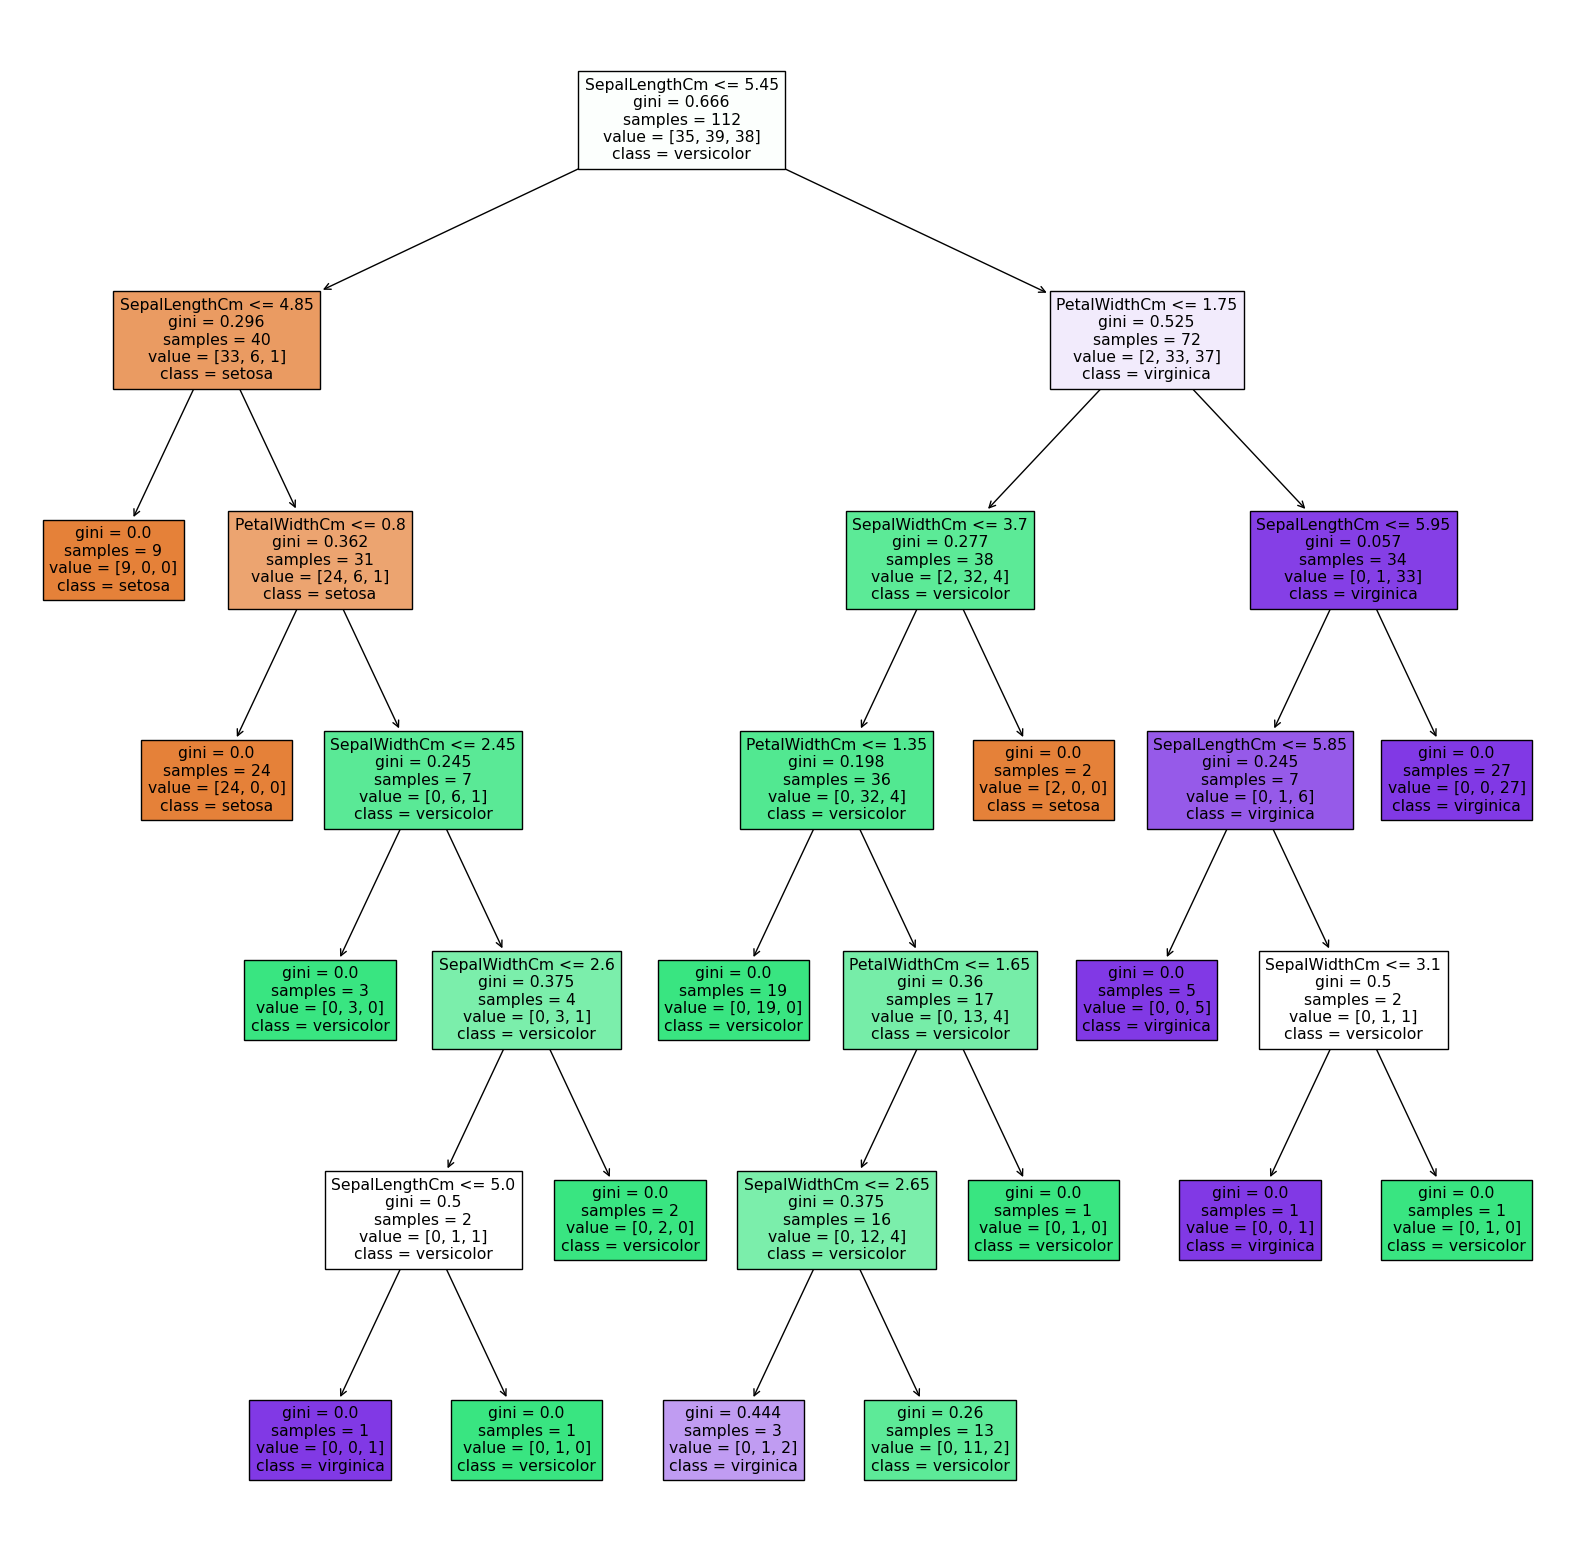

In [47]:
plt.figure(figsize = (20,20))
tree2 = tree.plot_tree(dt_tuned, filled = True, feature_names = features, class_names = targets)

# **Random Forest**


# Hiperparametros

**Estimator**

> Número de árvores que o algorítmo cria antes de calcular a média das previsões.
>
> Provavelmente o mais importante hiper parametro. 
> > Em geral uma árvore mais alta melhora o desempenho
> >
> > Mais estável e com menor custo computacional


**Max_features**

> Número máximo de tentativas que o algorítmo pode tentar em uma única árvore
>
> Número máximo de recursos

**Min_sample_leaf**

> Determina o número mínimo de folhas necessárias para splitar um nó interno





# Vantagens/Desvantagens

**Vantagens**

> Pode ser usada tanto com Regressão (Linear Regression e Logistic Regression) quanto com classification tasks
>
> Considerado um algorítmo útil e fácil de usar por normalmente dar ótimos resultados com os hiperparametros default
>
> Poucos hiperparametros e fáceis de entender



**Desvantagens**

> Alguns casos podem ter resultar em lentidão e ser ineficiente em tempo real
> 
> Pode ser treinado rapidamente mas pode dar resultados muito lentos depois de treinado
>
> Rápido suficiente para a maioria das aplicações, mas se a execução em tempo real for crucial, é melhor utilizar outras abordagens

# **Random Forest Modelling**

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf_model = RandomForestClassifier()

In [50]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
y_pred = rf_model.predict(X_test)

In [52]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9736842105263158


In [53]:
cv_scores = cross_val_score(estimator = rf_model, X = X_train, y = y_train, cv = 10)
cv_scores.mean()

0.9098484848484848

In [54]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


Text(0.5, 23.52222222222222, 'Predicted Label')

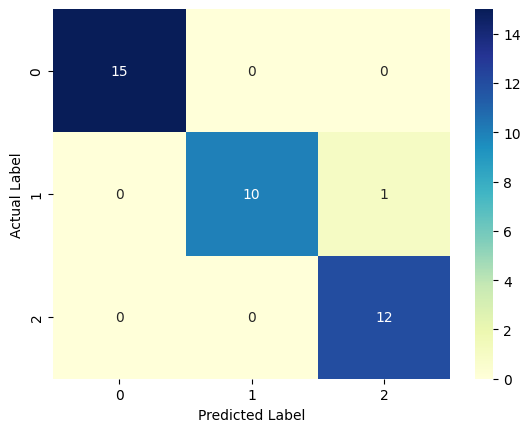

In [55]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot = True, cmap = "YlGnBu")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [57]:
rf_model.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=211079186),
 DecisionTreeClassifier(max_features='sqrt', random_state=2136560817),
 DecisionTreeClassifier(max_features='sqrt', random_state=1573629649),
 DecisionTreeClassifier(max_features='sqrt', random_state=19344012),
 DecisionTreeClassifier(max_features='sqrt', random_state=668835239),
 DecisionTreeClassifier(max_features='sqrt', random_state=678896064),
 DecisionTreeClassifier(max_features='sqrt', random_state=174841515),
 DecisionTreeClassifier(max_features='sqrt', random_state=1668089894),
 DecisionTreeClassifier(max_features='sqrt', random_state=2101378327),
 DecisionTreeClassifier(max_features='sqrt', random_state=489513130),
 DecisionTreeClassifier(max_features='sqrt', random_state=1964460504),
 DecisionTreeClassifier(max_features='sqrt', random_state=503747686),
 DecisionTreeClassifier(max_features='sqrt', random_state=361367274),
 DecisionTreeClassifier(max_features='sqrt', random_state=1359174404),
 DecisionTreeCl

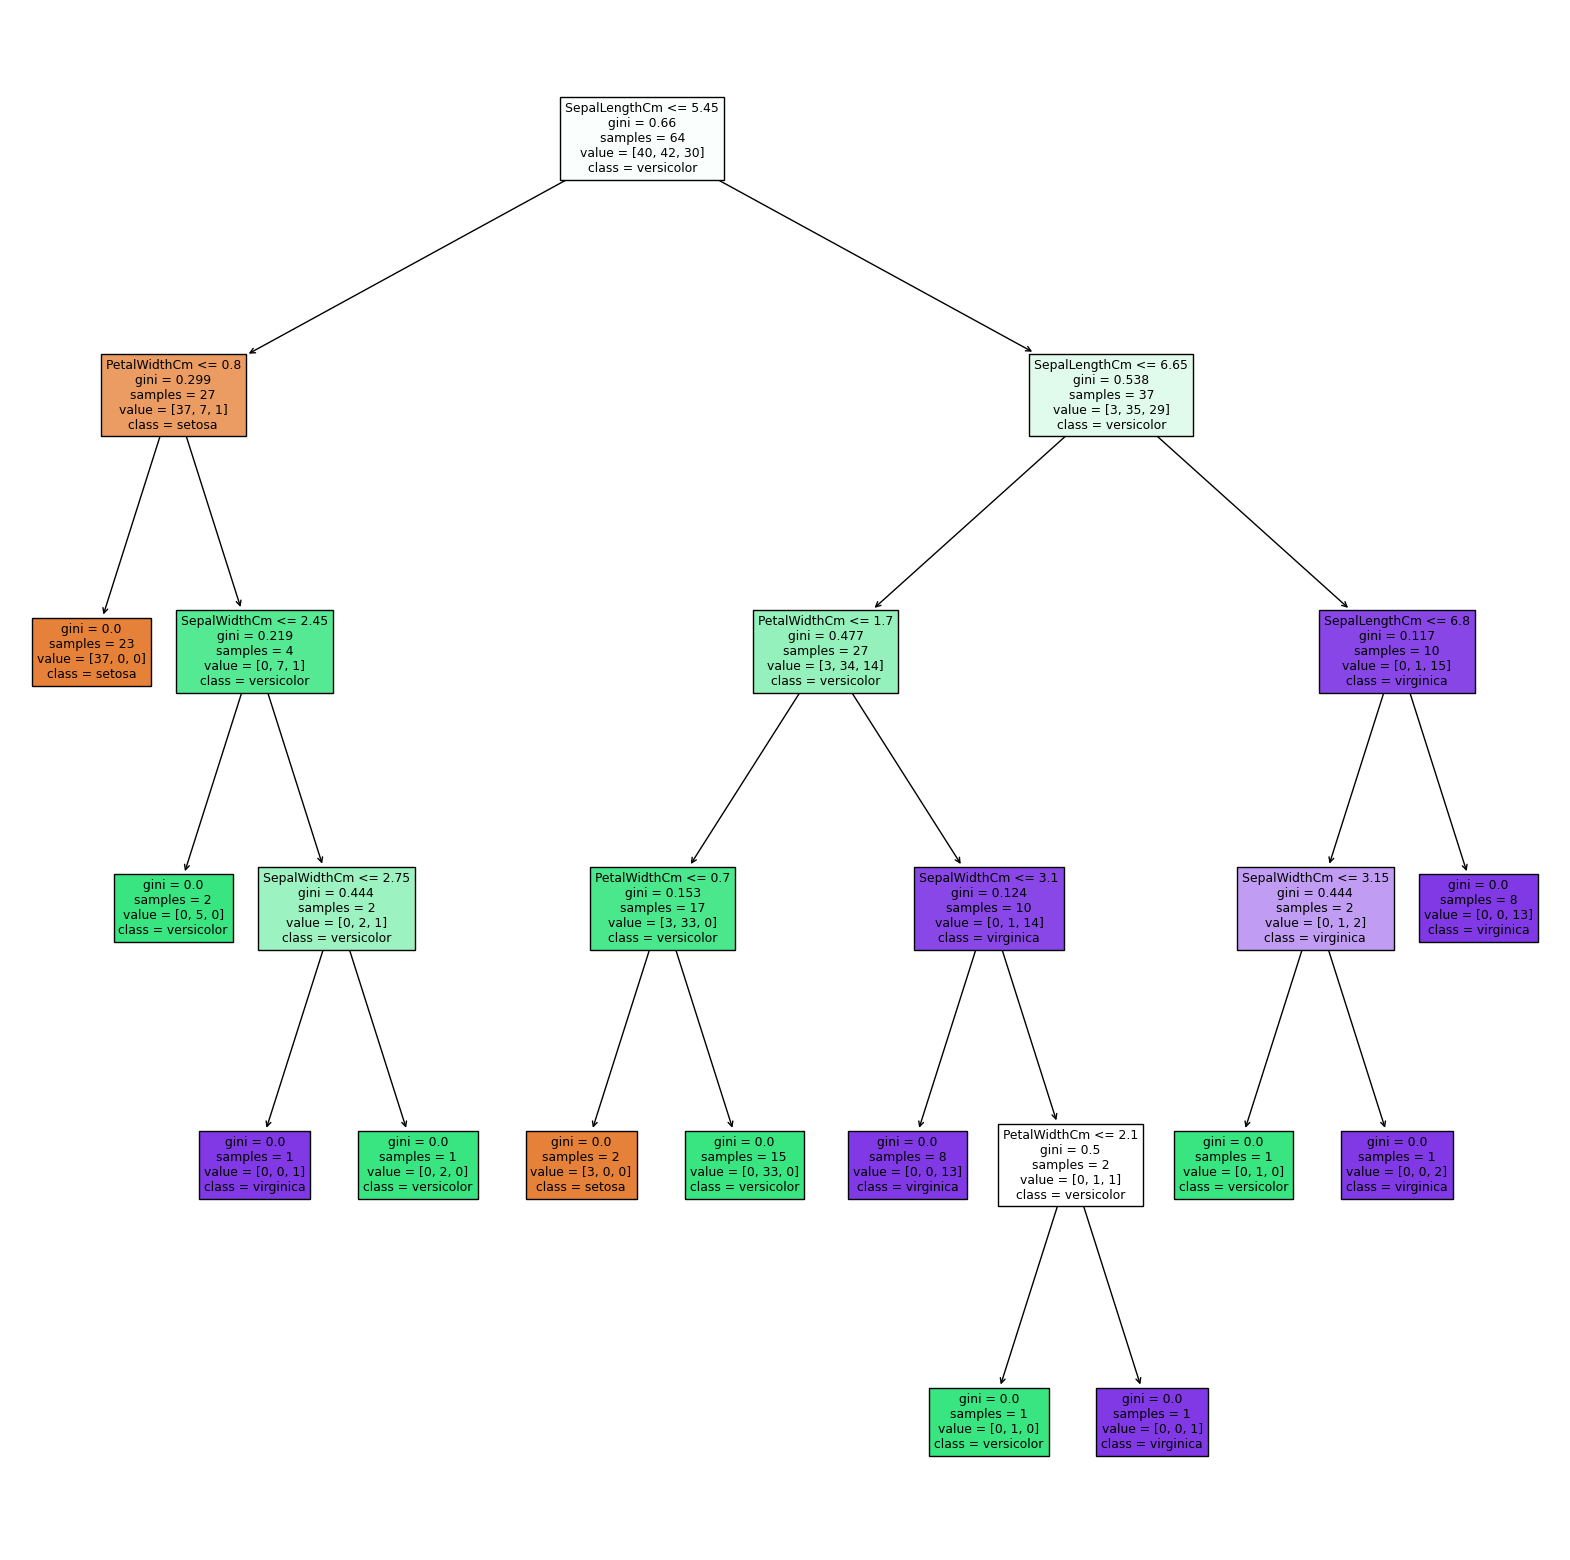

In [58]:
plt.figure(figsize = (20,20))
tree2 = tree.plot_tree(rf_model.estimators_[0], filled = True, feature_names = features, class_names = targets)

# **Hyperparameter Optimization**

In [59]:
rf_model2 = RandomForestClassifier()

In [60]:
rf_params = {"n_estimators" : [50, 100, 300],
            "max_depth" : [3, 5, 7],
            "max_features" : [2, 4, 6, 8],
            "min_samples_split" : [2, 4, 6]}

In [61]:
rf_cv_model = GridSearchCV(rf_model2, rf_params, cv = 5, n_jobs = -1)

In [62]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 300]})

In [63]:
rf_cv_model.best_params_

{'max_depth': 3, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}

In [64]:
rf_tuned = RandomForestClassifier(max_depth = 3,
                                 max_features = 2,
                                 min_samples_split = 2,
                                 n_estimators = 50)

In [65]:
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=50)

In [66]:
y_pred = rf_tuned.predict(X_test)

In [67]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 1.0


In [68]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


Text(0.5, 23.52222222222222, 'Predicted Label')

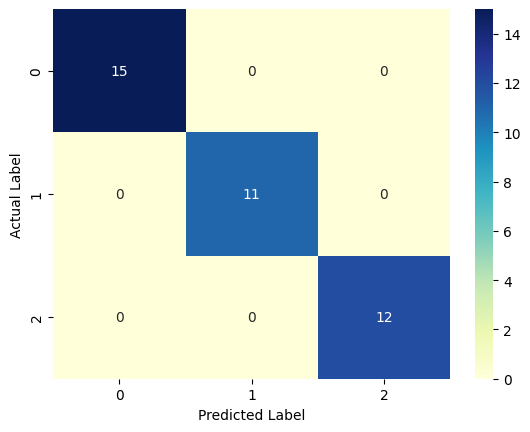

In [69]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot = True, cmap = "YlGnBu")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [71]:
rf_tuned.feature_importances_

array([0.15277551, 0.04305021, 0.80417428])

In [72]:
X_train.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm'], dtype='object')

In [73]:
best_features = pd.Series(rf_tuned.feature_importances_,
                         index = X_train.columns).sort_values(ascending = False)

In [74]:
best_features

PetalWidthCm     0.804174
SepalLengthCm    0.152776
SepalWidthCm     0.043050
dtype: float64

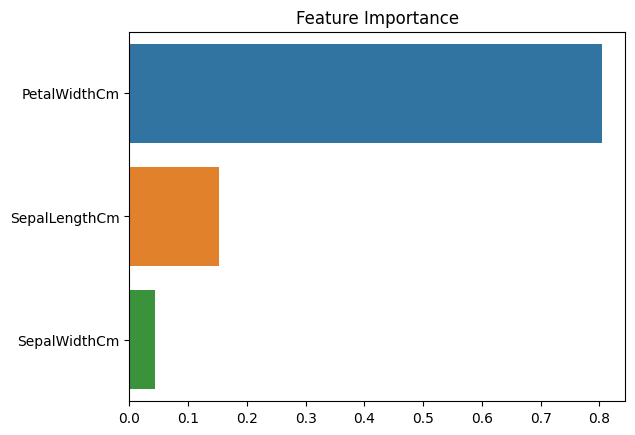

In [75]:
sns.barplot(x = best_features, y = best_features.index)
plt.title("Feature Importance")
plt.show()